# 0. 모듈 불러오기

In [2]:
from IPython.display import Image
import cv2

import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# 📰 1. '개발자 모시기'의 등장

채용시장에서 '개발자 모시기' 라는 용어가 생길 정도로 개발자에 대한 기업의 수요가 증가하고 있습니다. 
 
> 그렇다면, **`개발자`**는 어떤 기준으로 기업을 선택하고 **`채용 시장`**에선 어떤 개발자들을 원하고 있는 걸까요? 

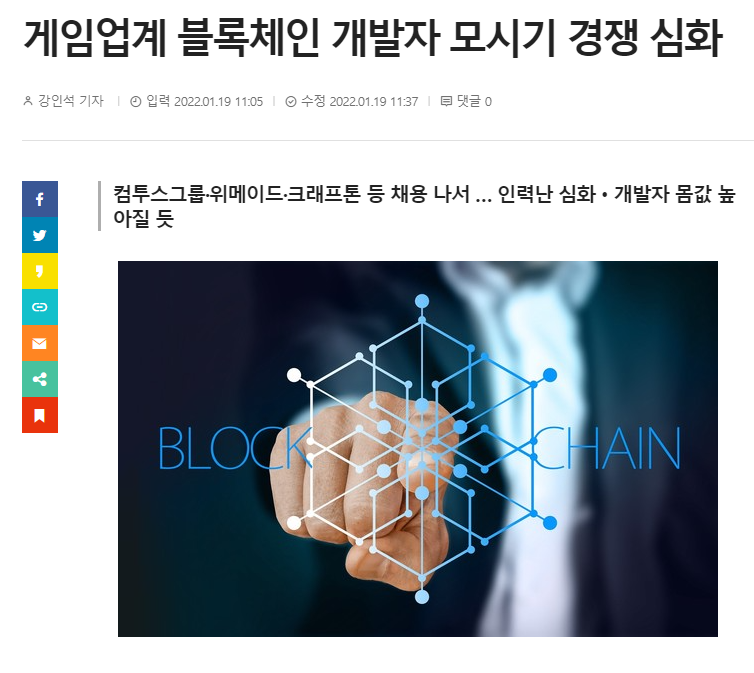

In [13]:
Image(filename = "Image/개발자모시기.png")

# ⭐ 2. 프로젝트의 목적 

>**1) 전반적인 개발자 채용 트렌드에 대해 알아본다.** <br>
>**2) 구직자인 개발자와 채용자인 기업의 특성을 각각 분석하여 비교한다.** <br>
>**3) 이를 통해, 개발자를 위한 채용 트렌드와 기업 트렌드를 제공한다.**


저희는 분석을 진행하기 앞서, 용어에 대한 정의를 내렸습니다.

### 2.1 개발자란? 
저희는 다음과 같이 정의했습니다. 
> 개발언어를 사용하여 업무를 수행하는 사람들’ 

### 2.2 채용트렌드란? 
저희는 다음과 같이 정의했습니다. 
> '기존과 다른 새로운 방향으로 채용이 변화해가는 경향이나 추세' 

### 2.3 기업트렌드란? 
저희는 다음과 같이 정의했습니다. 
> '구직자가 회사를 선택하는 다양한 기준' 



# 🌊 3. 채용트렌드를 알아보자

- 사용 데이터 
  - 네이버 뉴스 기사 제목 크롤링 
- 수집 방법 
  - '개발자 채용' 키워드 기준
  - 연도 별 수집 
    - 2020.12.24~2021.12.24 기준 5000개
    - 2019.12.24~2020.12.24 기준 5000개



In [ ]:
# image = cv2.imread("Image/news.png", cv2.IMREAD_ANYCOLOR)
# image = cv2.resize(image,dsize=(800,400))
# cv2_imshow(image)

## 3.1 Top 50 키워드

In [7]:
df_20 = pd.read_csv('./FinalData/df_20.csv')
df_21 = pd.read_csv('./FinalData/df_21.csv')

data_2020 =go.Bar(
x = df_20['word'], y = df_20['count'],
    name="2020년",
    # opacity=0.9,
    marker={'color':'rgb(179,205,227)', 'line':{'color':'White','width':1}}
    )

data_2021 =go.Bar(
x = df_21['word'], y = df_21['count'],
    name="2021년",
    # opacity=0.9,
    marker={'color':'rgb(251,180,174)', 'line':{'color':'White','width':1}}
    )
cnt_data = [data_2020, data_2021]
layout = go.Layout(
    title = '<b>개발자 채용 관련 뉴스 키워드 TOP 50</b>',
    xaxis = {'title':'키워드'},
    yaxis = {'title':'Count'},
    )

fig = go.Figure(data=cnt_data, layout=layout)
fig.show()


**[Top 5 해석]**

⇒ 2020년에는 코로나로 인해, 취업 시장이 얼어붙으면서 신입 채용보다 경력 채용이 선호되는 현상으로 보여집니다. (2020년 12위 : 코로나)

⇒ 하지만, 2021년에는 코로나 키워드의 순위가 50위권을 벗어나면서 채용 시장에서 코로나의 영향력이 줄어든 것으로 예상됩니다. 또한, **신입 키워드가 경력 키워드보다 우위에 있으면서, 개발자 채용 시장에서 신입 채용이 지난해보다 활발해진 것으로 예상**됩니다.

<br>

**[기업 종류 해석]**

⇒ 2020년 취업시장에서 활발한 활동을 보인 기업은 카카오였지만, 2021년 취업시장에서는 네이버의 활약이 더 돋보였습니다. 

⇒ 2020년 취업시장에서는 2021년에 비해 다양한 기업들이 순위권에 이름을 올렸다. 특히, IT기업들의 이름이 대부분이었습니다. 

⇒ 꾸준한 취업 공세를 보이는 기업은 **네이버, 카카오, 토스**로 볼 수 있습니다.

<br>

**[산업 종류 해석]**

⇒  2020년 가장 핫했던 개발 직군은 **AI**였던 것으로 보인다. 그 뒤로 게임, SW 개발자를 원하는 것을 알 수 있었다. 하지만, 2021년은 AI직군의 인기는 조금은 내려간 것으로 보입니다. 

⇒ 2021년 핫한 개발직군은 **커머스, 플랫폼, 메타버스**인 것으로 보입니다.

## 3.2 키워드 종류

In [9]:
fig = make_subplots(rows = 1, cols = 2,
                    specs = [[{'type' : 'pie'}, 
                              {'type' : 'pie'}]],
                    subplot_titles=("2020년", "2021년"))

fig.add_trace (go.Pie(labels = df_20['type'], values = df_20['count']),
               row = 1,  col = 1)
fig.add_trace (go.Pie(labels = df_21['type'], values = df_21['count']),
               row = 1,  col = 2)

fig.update_traces(marker = dict(line=dict(color='white', width=2)))

fig.update_layout(title = '<b>개발자 채용 관련 뉴스 키워드 종류</b>')
fig.show()

**[키워드 해석]**

⇒ TOP 50에서 키워드 성격 별 비율을 보았을 때, 

2020년 대비 2021년의 **채용 관련 키워드의 비율이 가장 크게 증가한 것**을 알 수 있습니다. 

특히, 해당 성격을 가진 키워드에는 ‘경쟁’, ‘전쟁’, ‘확보’ 등의 키워드가 포함되어 기업에서 개발자 영입에 열을 올리고 있음을 알 수 있다. 또한 ‘연봉’, ‘스톡옵션’ 의 키워드를 통해 **‘개발자 모셔오기’**가 이루어지고 있는 채용 시장의 모습을 확인할 수 있었다. 

또한, 2021년에 새롭게 교육 키워드가 출현하면서 **개발자 양성을 위한 취업 교육 시스템들이 증가**하고 있는 것을 확인할 수 있습니다.  


# 💻 4. 개발자(구직자)는 어떤 특성을 가지고 있을까?

- 사용데이터

    - Stack Overflow 데이터 사용
    - Github API 사용


- 수집 방법

    - Stack Overflow가 제공해주는 2017, 2018, 2019, 2020, 2021 설문 조사 데이터를 가져왔습니다.
    - Github API를 활용해 네카라쿠배당토의 Repository 데이터를 수집하였습니다.

## 4.0 IT 구직 트렌드

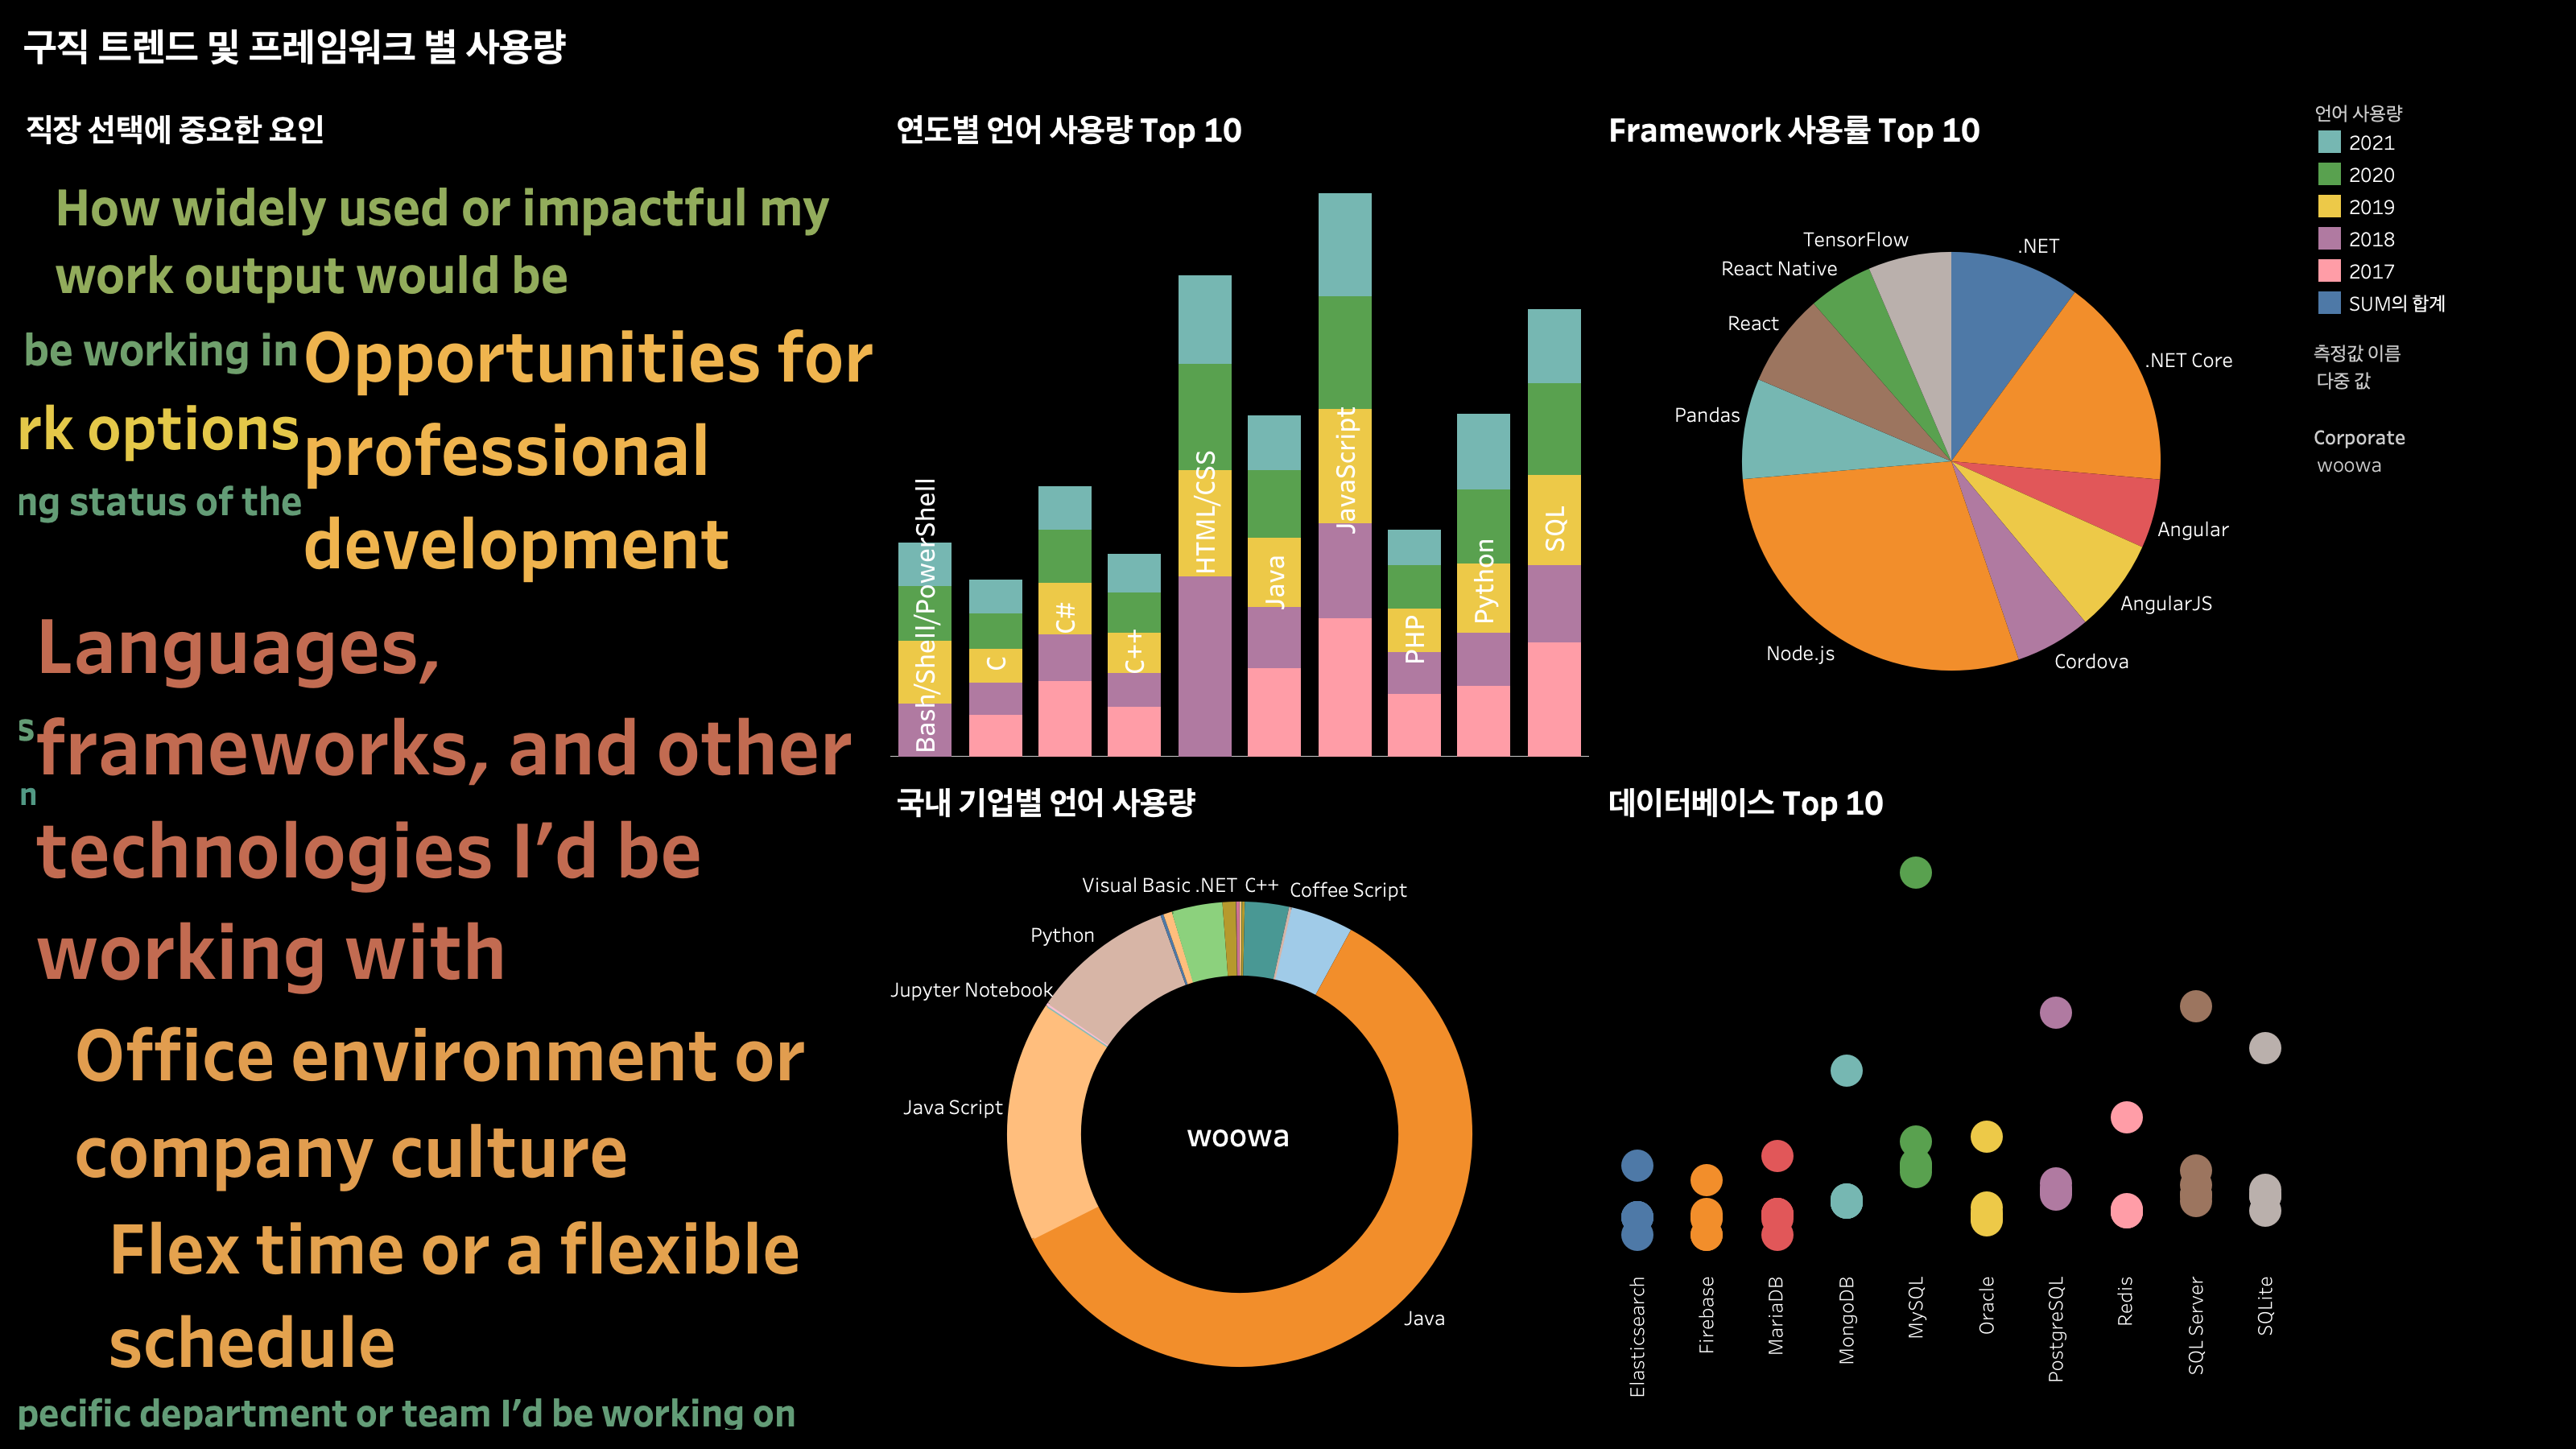

In [18]:
# 대시보드 첨부
Image(filename="dashboard1.png")

첫번째는 IT 구직 트렌드 대시보드 입니다. 개발자의 경우 구직하는 과정에서 회사가 만들어내는 프로덕트나 기업의 규모 및 언어에 맞춰 회사를 선택하게 됩니다. 예를 들어, 스타트업의 경우에는 최신 기술 트렌드를 빠르게 파악하고 서비스에 적용하는 경우가 많아 개발 언어 및 프레임워크에 대한 이해도가 높은 구직자를 선택하게 됩니다. 이 대시보드를 통해 구직자들이 새로 등장한 기술이나 수요가 많은 언어에 대하여 대비할 수 있을 거라 생각합니다.

## 4.1 개발자의 직장 선택 기준

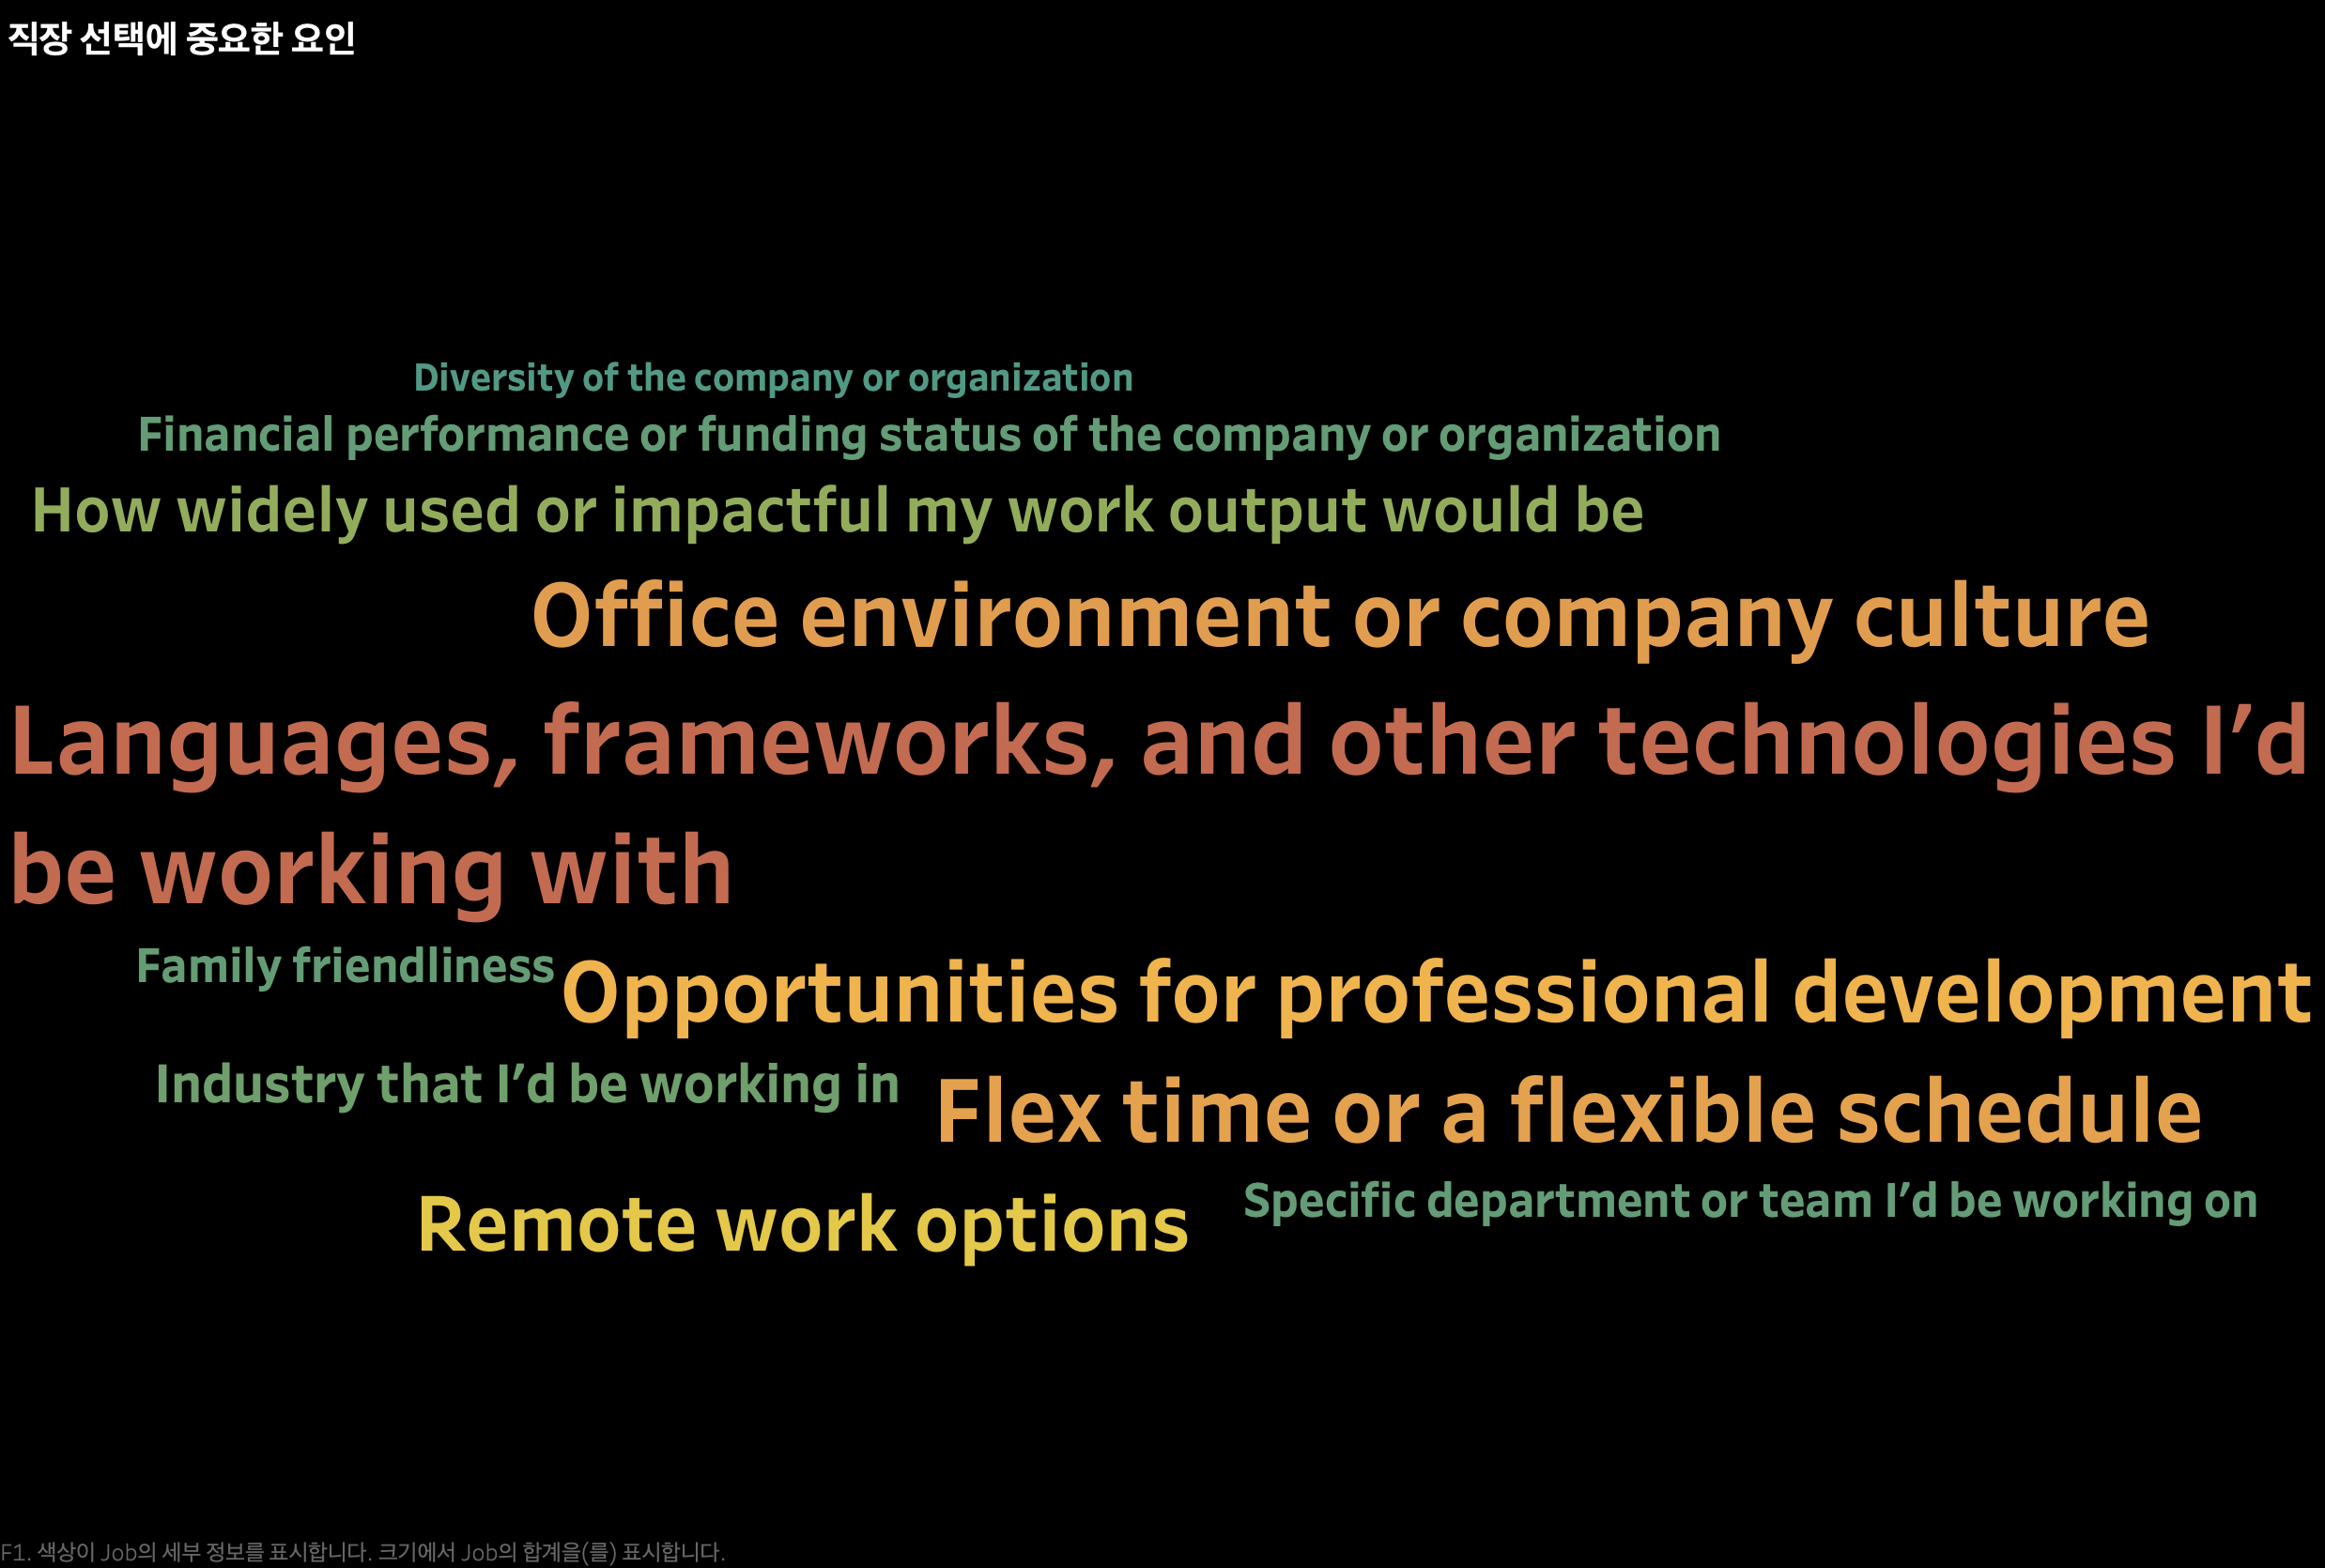

In [8]:
Image(filename = "importance_of_job.png")

**[워드클라우드 해석]**

개발자는 다음과 같은 기준으로 직장을 선택한다는 것을 알 수 있었습니다. 
- 현재 내가 사용하고 있는 언어와 기업에서 사용하는 언어의 일치
- 기업이 사용하는 기술 (프레임워크)
- 기업의 성장 가능성
- 기업 문화

⇒ 따라서 선택의 중요 요소인 언어, 기술을 기준으로 개발자의 특성을 시각화하였습니다

## 4.2 개발자가 가장 많이 사용하는 언어와 프레임워크

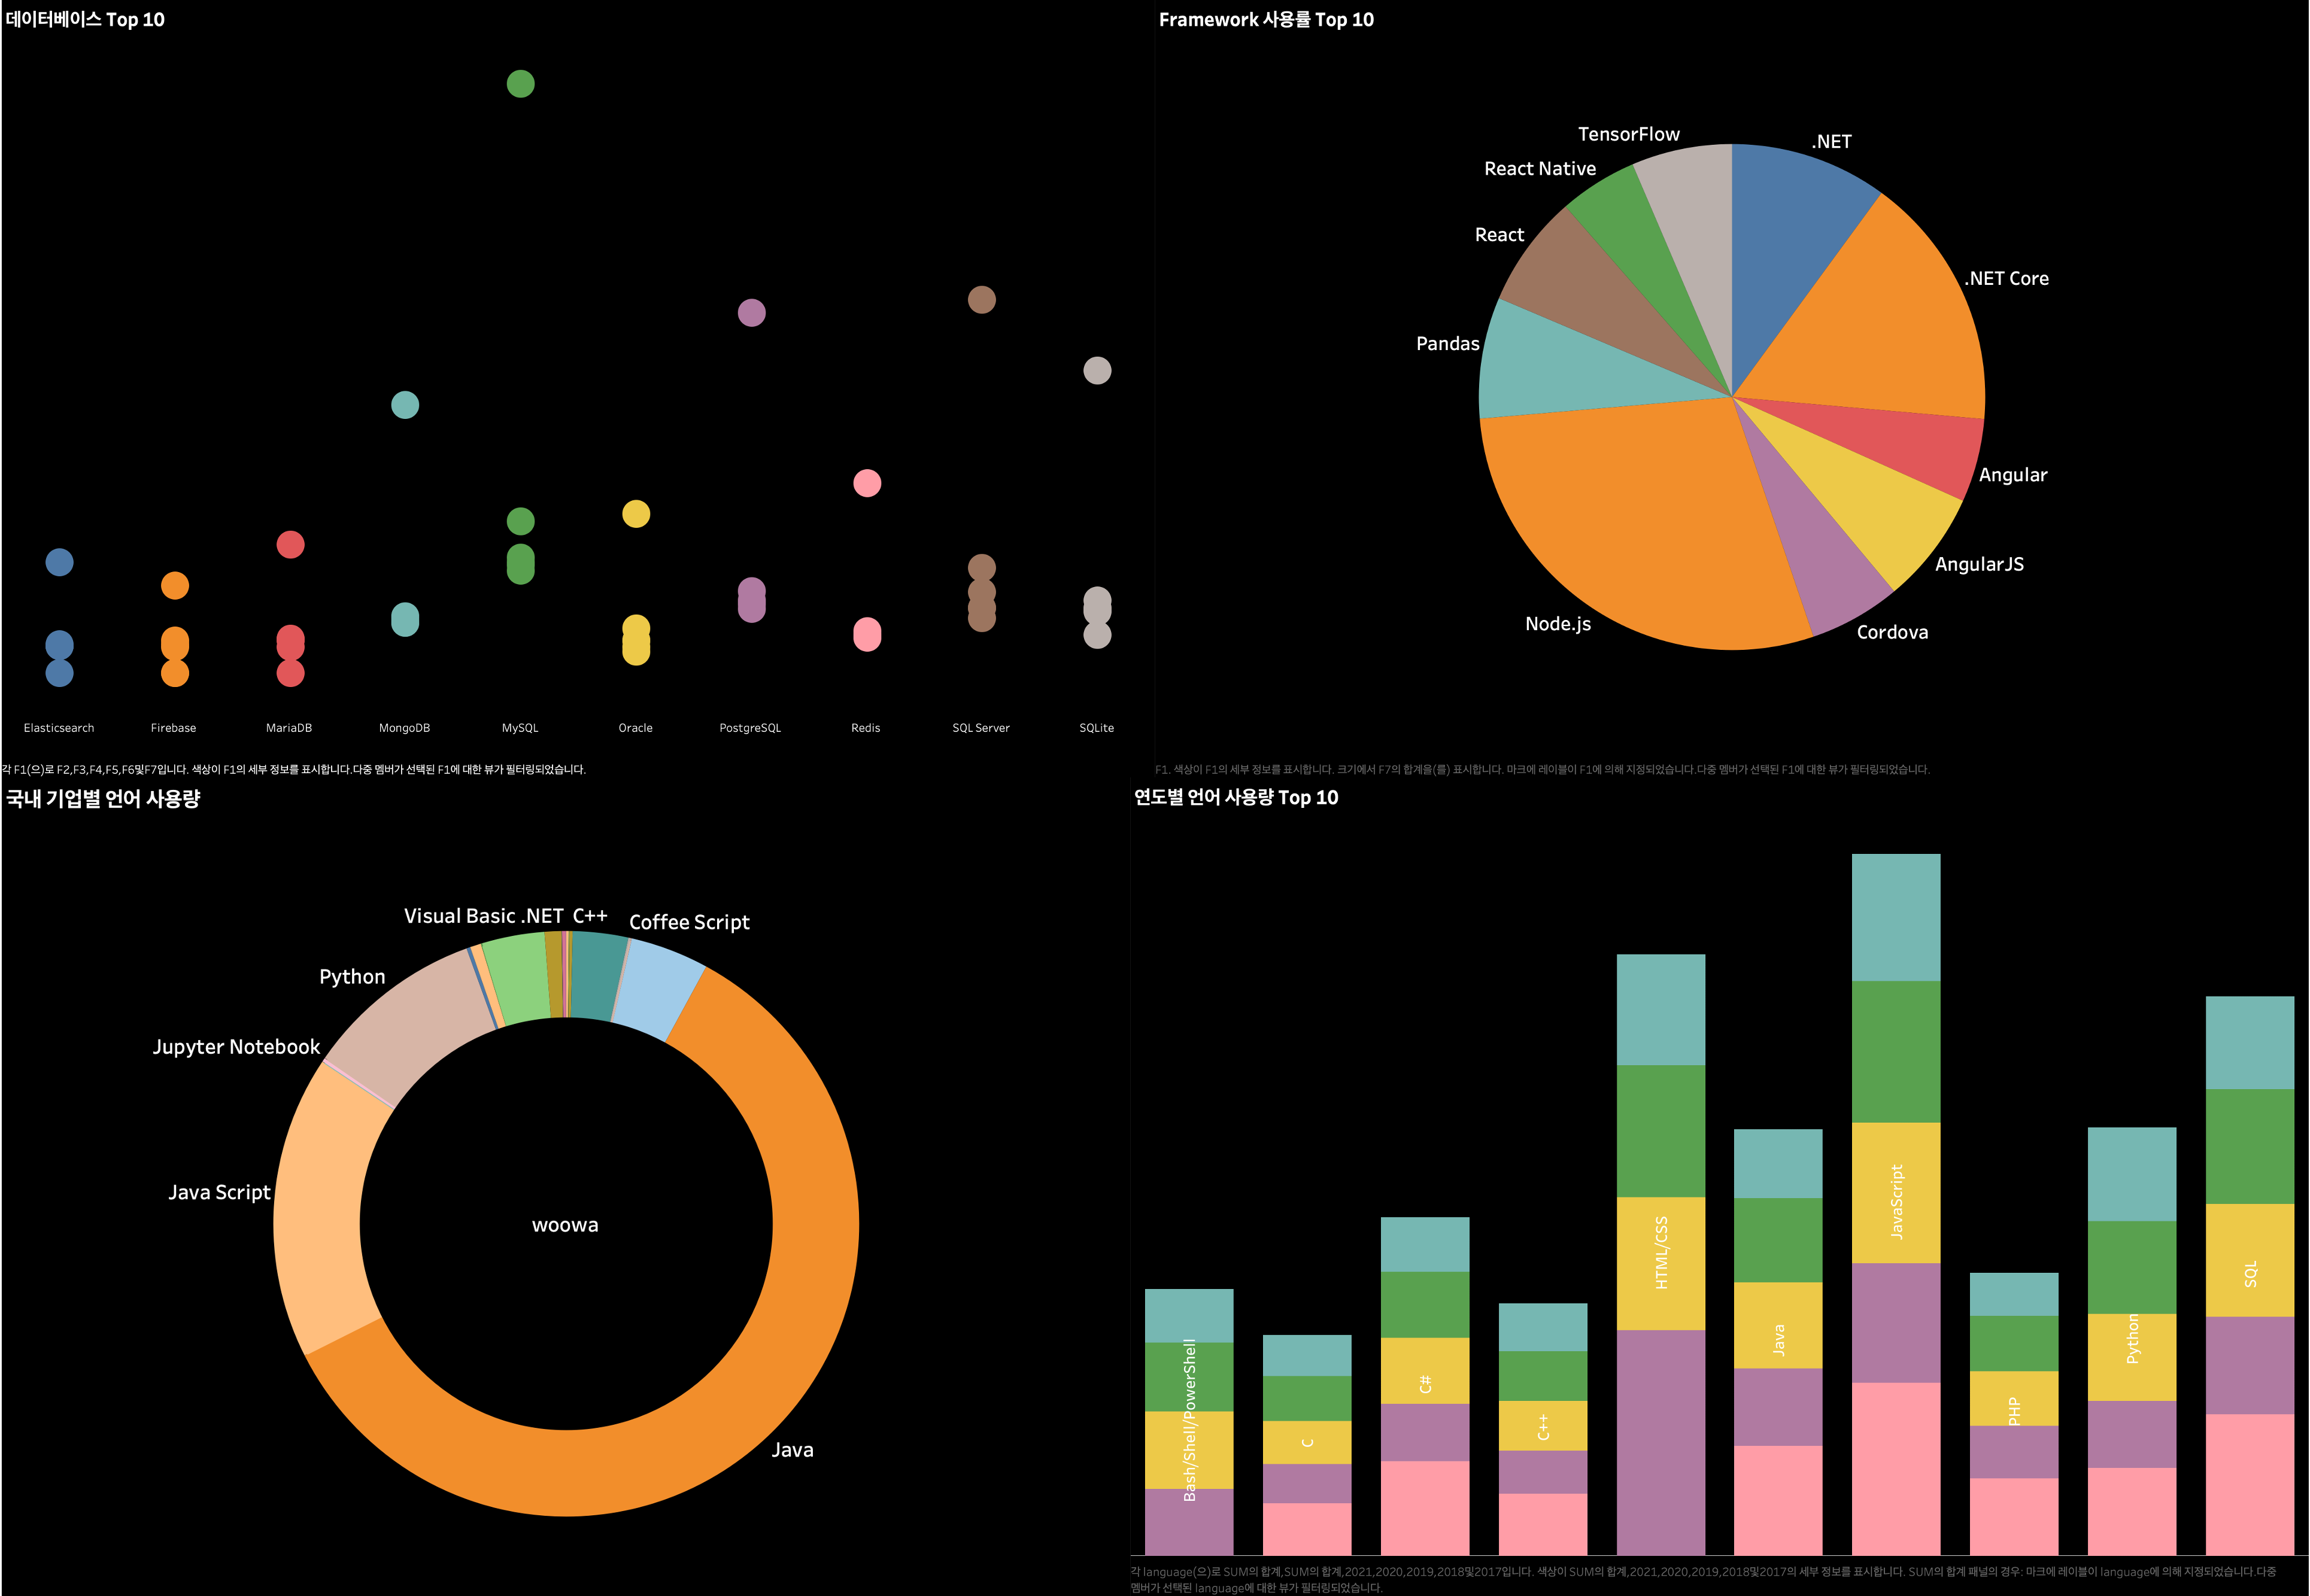

In [8]:
# 대시보드 첨부
Image(filename="Image/framework.png")

**[워크시트 해석]**

개발자가 직장을 선택하는 기준에 맞춰서 언어 및 프레임 워크 Top 10으로 설정하였습니다.
- 연도별 언어 사용량 Top 10 : 대체적으로 웹 개발량이 많아 Javascript 사용량이 많지만 빅데이터의 확장에 따라 Python 사용량도 점점 많아지고 있습니다.
- 데이터베이스 Top 10 : 기본 DB로서 MySQL을 사용하며 RDBMS를 제어하기 위한 다른 DB도 사용함을 알 수 있습니다.
- Framework 사용률 Top 10 : 주로 웹 백엔드 프레임워크인 Node.js 사용량이 많음을 알 수 있습니다. 
- 국내 기업별 언어 사용량(네카라쿠배당토) : 대시보드에서 각 기업을 선택하여 언어 사용량을 다르게 볼 수 있습니다. 

⇒ 개발자가 사용하는 기술들을 거시적 측면에서 트렌드를 시각화하였습니다.

# 5. 그렇다면 기업은 어떤 개발자를 원하는가? 

개발자가 직장을 선택하는 요건을 기준으로 시각화를 진행하였습니다. 

- 사용 데이터 
  - 사람인 
  - 로켓펀치 데이터 
- 수집 방법 
  - 사람인 : 공고 크롤링 (2021년 12월 20~21일 기준, 5000개 )
  - 로켓펀치 : 한국산업기술시험원에서 제공하는 기업정보와 채용정보 데이터와 .... 를 가져왔습니다.

-

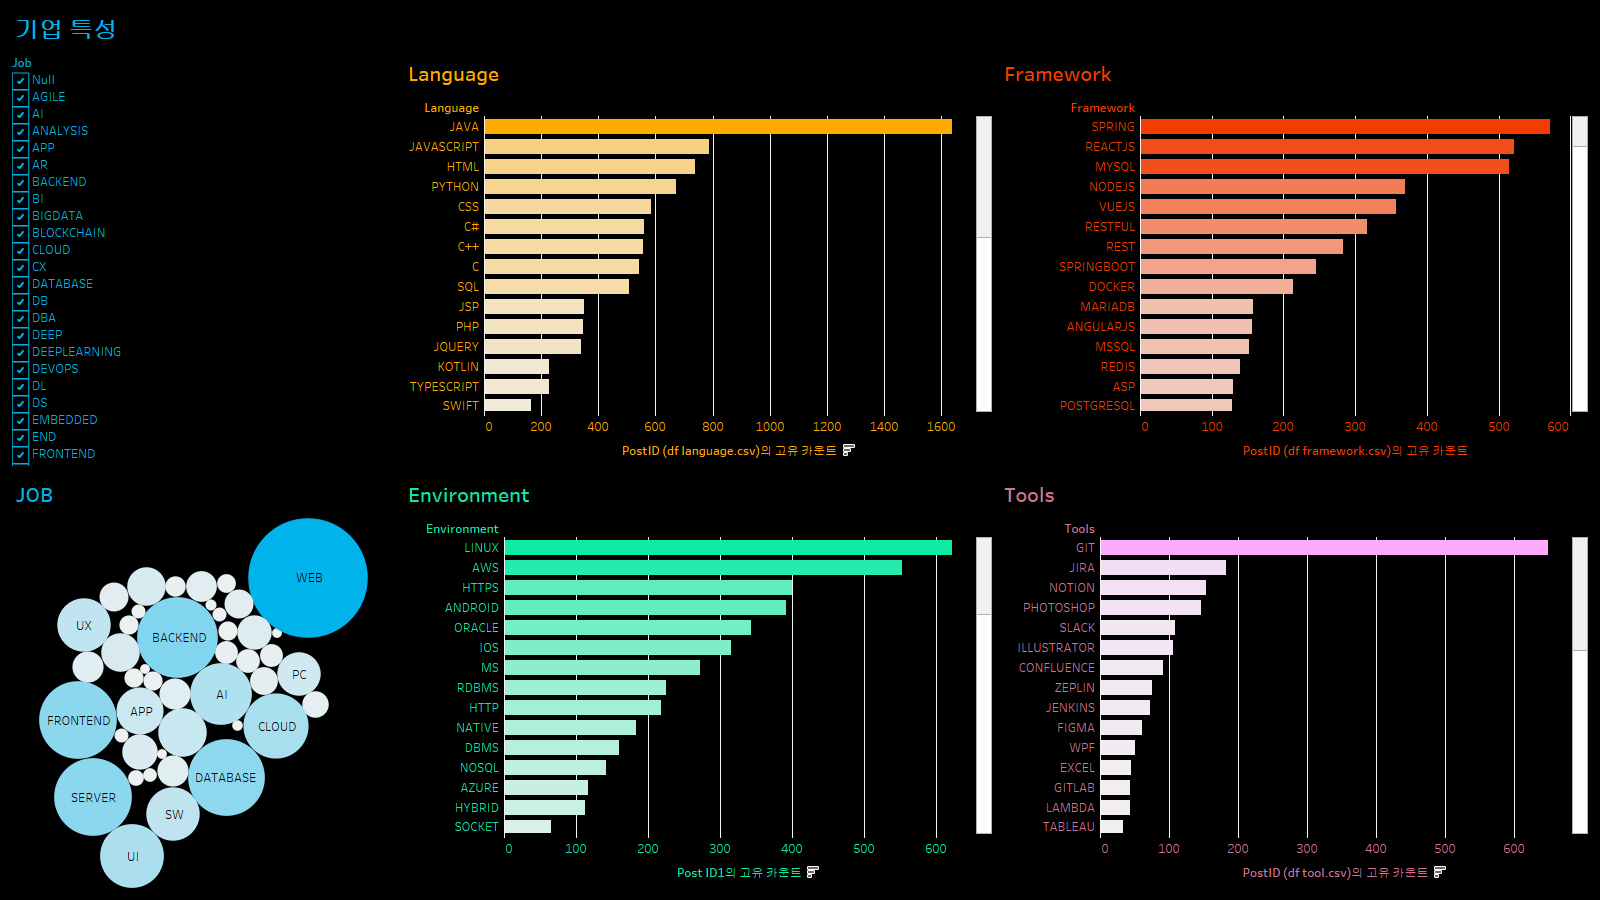

In [4]:
# 대시보드 첨부
Image(filename="Image/ALL.png")

**[용어 정의]** 
- Job : 직무 및 산업 키워드 
- Language : 개발에 사용되는 컴퓨터 언어 
- Framework : 개발에 사용되는 라이브러리 및 프레임워크 
- Environment : 개발 환경 및 직무 중 세부 분야
- Tool : 업무 시 사용되는 툴 


두 번째는 사람인, 로켓펀치에 등록된 기업 공고를 활용해 기업이 어떤 개발자를 원하는지를 시각화한 대시보드입니다. 
해당 대시보드는 Job 필터를 통해 필요한 정보만을 얻을 수 있습니다. 각각의 시트에 그려진 그래프는 선택 Job 키워드가 포함되어 있던 공고에 같이 언급된 키워드의 개수를 나타낸 것입니다. 이를 통해, 구직자는 기업이 사용하는 언어, 기술, 도구의 트렌드를 알 수 있어 구직을 준비하는 데에 도움이 되리라 생각됩니다. 


아래에는 대표적으로 두 가지 Job을 선택한 대시보드를 보여드리도록 하겠습니다. 3.1 Top50 키워드 그래프 중 2021년 기준 언급되었던 AI, 메타버스를 JOB으로 선택하여 각각 아래와 같이 예시 대시보드를 만들었습니다. 

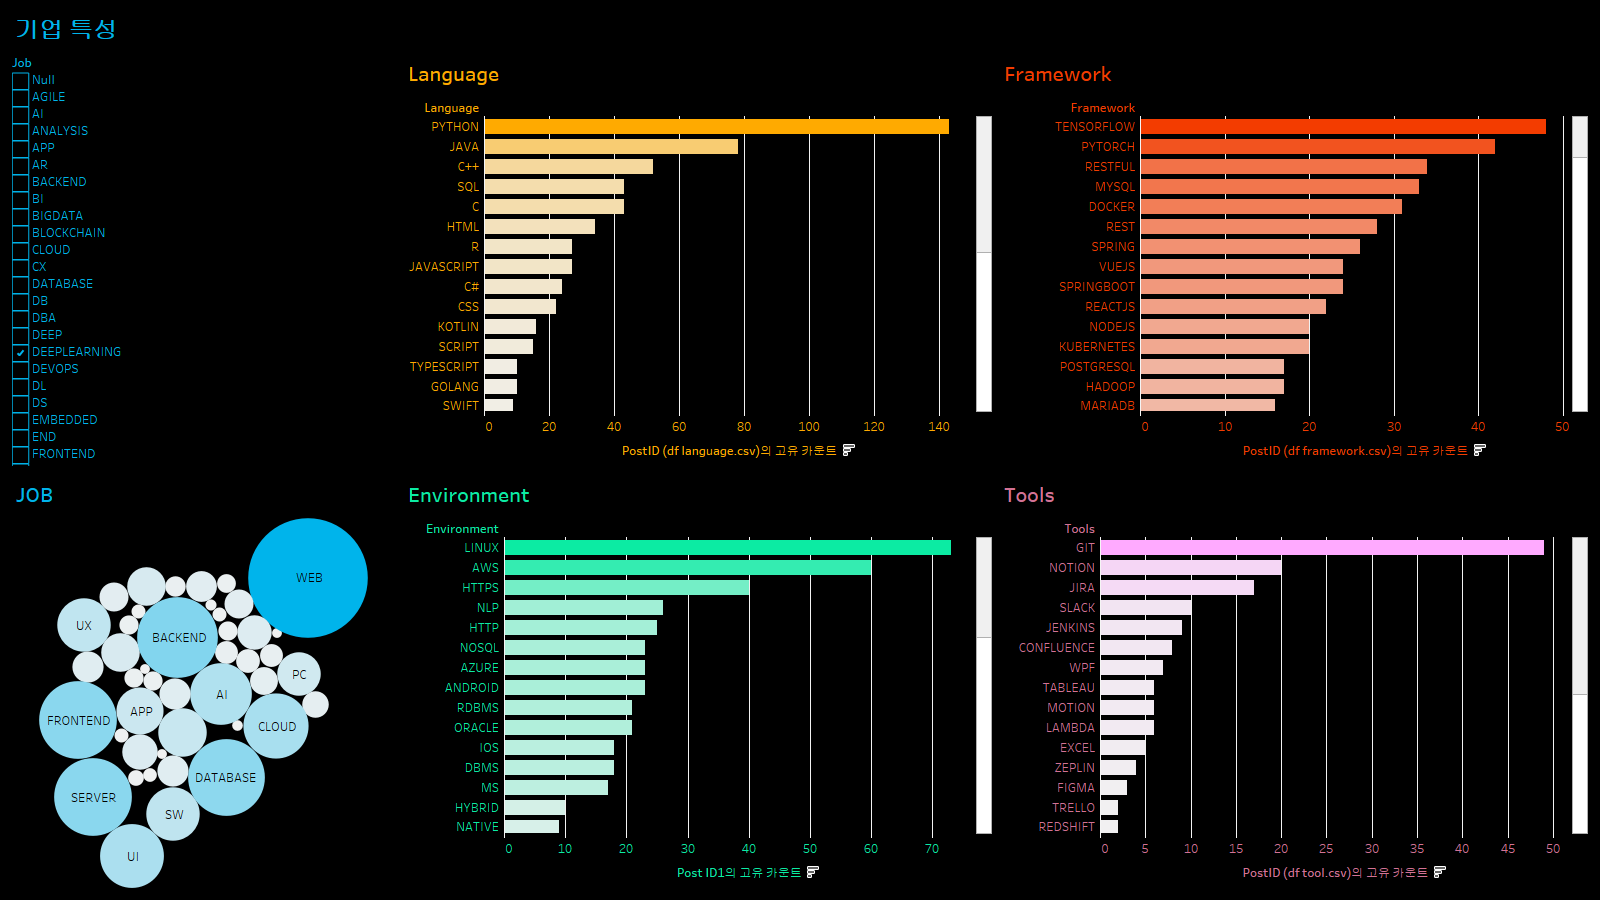

In [5]:
# 대시보드 첨부
Image(filename="Image/AI.png")

**[대시보드 해석]**

- 선택 JOB : DEEPLEARNING, MACHINELEARNING

- 해당 Job 키워드가 포함된 공고에서 가장 많이 언급된 언어 키워드는 파이썬인 것을 알 수 있습니다. 파이썬이 인공지능 분야에서 사용되는 언어인만큼 역시나 가장 많이 언급된 것을 알 수 있었습니다.  프레임워크 중에서는 딥러닝 프레임워크로 사용되는 Tensorflow, Pytorch가 가장 많이 함께 언급된 것을 알 수 있습니다. 또한 Environment에서는 LINUX와 NLP(자연어처리)가 눈에 띄는 키워드입니다. 또한 역시나 가장 많이 언급된 Tool은 Git인 것을 확인할 수 있습니다. 따라서 딥러닝, 머신러닝 직무를 꿈꾸는 개발자라면 파이썬을 주언어로 사용하며, 프레임워크로는 Tensorflow, Pytorch를 공부해야 할 것입니다. 리눅스 환경에 익숙해야 할 것이며 Git 또한 잘 활용하는 개발자가 취업에 유리할 것입니다. 

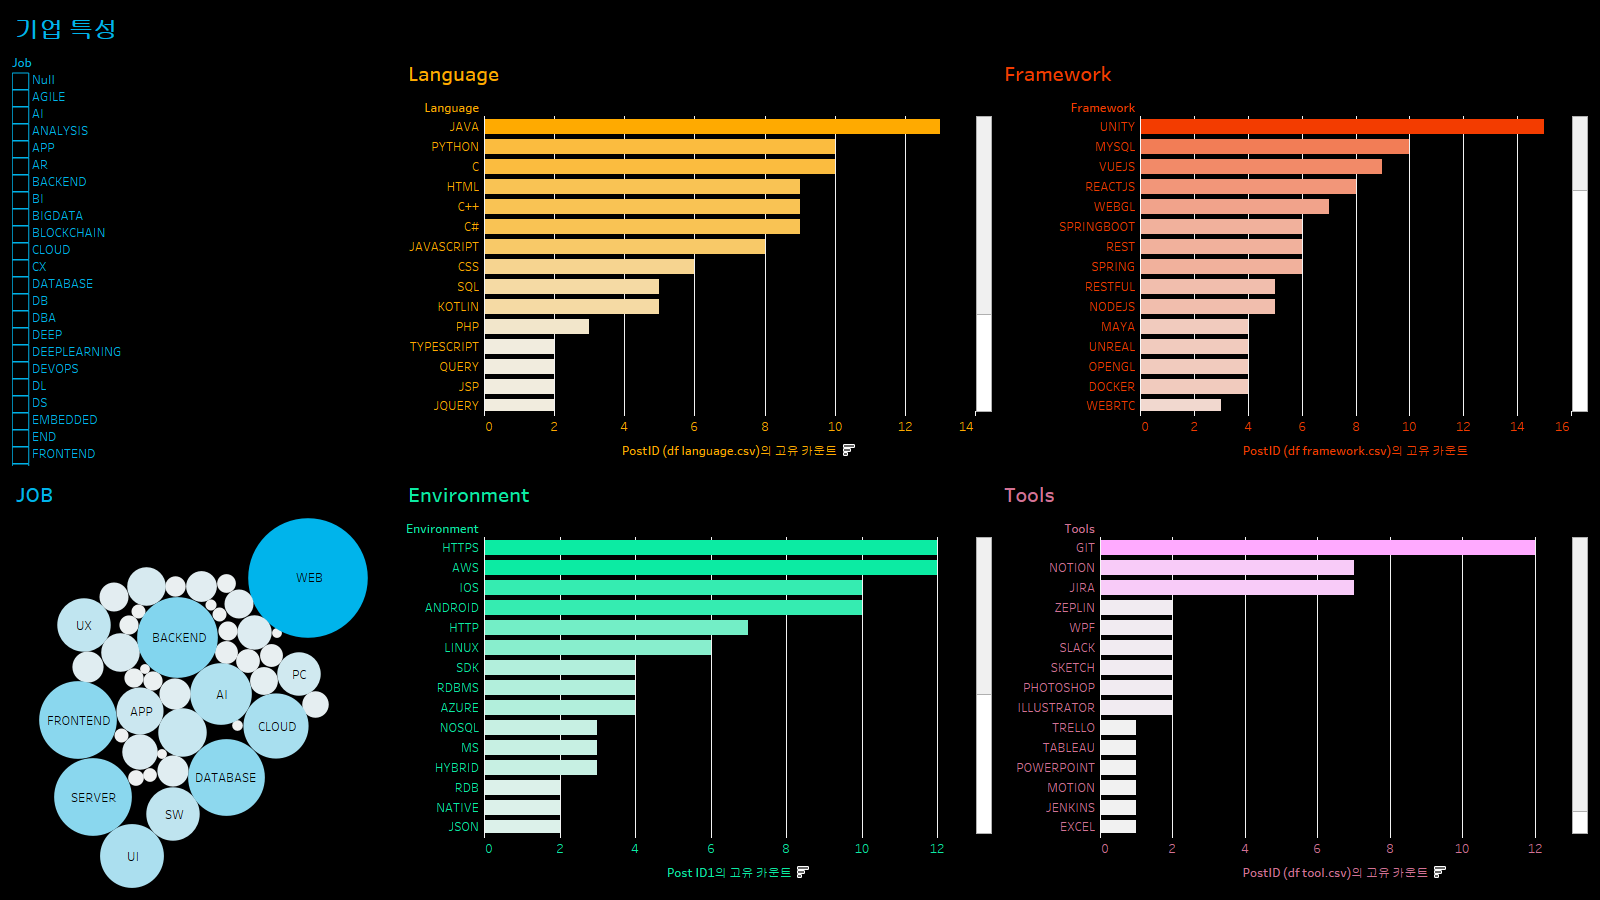

In [6]:
# 대시보드 첨부
Image(filename="Image/METAVERSE.png")

**[대시보드 해석]**
- 선택 JOB : METAVERSE 

- 해당 Job 키워드가 포함된 공고에서 가장 많이 언급된 언어 키워드는 JAVA인 것을 알 수 있습니다.  하지만 프레임워크에서는 Unity가 가장 많이 언급된 것으로 보아, 메타버스 산업 자체가 게임세계와 같은 가상 세계이기 때문인 것으로 유추됩니다. Environment로 가장 많이 언급된 것은 HTTPS와 AWS인 것으로 보아 웹 통신 프로토콜과 AWS 환경에서의 개발에 대한 이해가 필요할 것으로 보입니다. 여기서도 마찬가지로 가장 많이 언급된 Tool은 Git인 것을 확인할 수 있습니다. 

## 마무리하며

1. 분석의 한계점
<br>

 - Github API 수집의 한계
<br>

    - 원래 초기 대시보드의 목표는 지원자의 깃헙과 기업의 깃헙의 언어 및 키워드를 가져와 비교 및 일치율을 나타내려고 하였습니다. 그러나 API를 사용하는 과정에서 요청량이 많아 Access Limit이 초과하는 경우가 존재하여 방향을 수정하게 되었습니다. 


 - 데이터 신뢰도 문제
<br>

    - 데이터 정제 문제 : 공고 데이터의 개발언어, 프레임워크, 개발환경, 직무 등 시각화에 필요한 값들이 규칙성이 없어 일괄적인 데이터 처리를 위한 방법을 강구하기가 어려웠습니다. 용이한 데이터 처리를 위한 데이터 변환 과정에서 수작업으로 처리하다보니 많은 시간이 소요되었고, 텍스트 데이터의 전처리 및 토큰화 과정에서 다양한 특수기호가 존재하면서 누락데이터가 발생하였을 수 있습니다. 
<br>

    - 데이터 수집기간 불일치 : 사용한 데이터간의 기간차이가 있어서 데이터 간 비교 해석의 신뢰도가 떨어질 수 있습니다.
<br>

 - 기술 트렌드 시각화의 한계점 
<br>

	- 사용되는 언어 및 프레임워크가 많아 Top 10으로 표현을 하였는데 이는 go와 같은 최신 언어의 사용량 증가를 나타내는데는 한계점이 존재하였습니다.
    
    
2. 분석의 의의

 - 위 대시보드를 작성하는 저희는 학교를 졸업하거나 취업 준비를 하고 있는 학생으로서 IT 기업에 개발자로 취직하기 위해 필요한 것이 무엇인지 고민을 많이 해보았습니다. 대체로 코딩테스트, CS 면접 기본적인 것에 대하여 준비를 해야하는 것을 알고 있었지만 직무별 요구되는 개발 프레임워크나 언어 등 자세한 방향을 찾기에는 어려움이 있었습니다. 저와 같은 고민을 하고 있는 분들이 개발자가 회사를 선택하는 과정에서 본인의 기준을 잘 잡을 수 있도록 도움이 되었으면 합니다. 
<br>

 - 여러분들이 이번 대시보드를 보면서 최신 떠오르는 기술 트렌드나 기업에서 요구하는 언어 및 프레임워크에 대하여 빠르게 파악할 수 있다고 자부할 수 있습니다. 또한, 개발자는 지속적인 성장이 필요한 직무인만큼 기술의 속도를 따라가며 개인의 경쟁력을 확보할 수 있을 것이라고 생각합니다. 같은 사회초년생이자 취준생으로서 모두 화이팅하시길 바랍니다!

### 부록) 데이터 전처리 과정

- 뉴스 데이터 수집 : https://github.com/datacampic/dacon_JobTrend_visualization/blob/main/news.ipynb


- 뉴스 구직 트렌드 분석 : https://github.com/datacampic/dacon_JobTrend_visualization/blob/main/trend_keyword.ipynb


- 구직 공고 데이터 병합 : https://github.com/datacampic/dacon_JobTrend_visualization/blob/main/FinalSubmit.ipynb


- Stack-Overflow 데이터 전처리 : https://github.com/datacampic/dacon_JobTrend_visualization/blob/main/stack-overflow-trend.ipynb